# Script 3: degrading spectra

Sometimes it is necessary to introduce noise into a spectrum, especially synthetic ones. This script allows to introduce random noise using the NumPy utility "random.normal".

In [1]:
from PyAstronomy import pyasl
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

Reading spectra module. Requires the path where the spectra are located.


In [2]:
def readSpec(filename, path):
    
    sp = fits.open(path + filename)
    header = sp[0].header
      
    tf = sp[0].data
    tf = tf.flatten()
 
    wvl, flx = pyasl.read1dFitsSpec(path + filename)
 
    sp.close()

    date_obs = header['DATE']

    return header, wvl, flx, date_obs, tf

Module used to introduce random noise using the "normal" function. The variable 'mean' allows to normalize spectrum baseline to flux = 1 if the value '0' is selected (by defect). Value 'sd' is selected between 0 and 1, being 0 a noise-free value. 

It is adviced to use 'sd' low-values. A good start point is 0.1 or 0.01, depending on the spectrum signal intensity.

In [ ]:
def noise(flux):
    
    mean_i = input("Enter the mean of the normal distribution (0 by defect): ")
    if mean_i == "":
        mean = 0
    else:
        mean = float(mean_i)
    sd = float(input("Enter the standars desviation of the normal distribution: "))
    ns = np.random.normal(mean, sd, len(flux))
    
    return flux + ns

Function used to save spectra. Some fits headers are modified.


In [4]:
def saveSpec(filename, header, wavelength, flux, date_obs):
    print("Fecha obs:")
    print(date_obs)
    
    header['CRVAL1'] = wavelength[0]
    header['DATE'] = date_obs
    hdu = fits.PrimaryHDU(flux, header)
    hdu.writeto(filename, overwrite=True)  
    
   

Function to plot spectra. We can change the size modifying the 'figsize' value.

In [5]:
def plotSpectrum(wavelength, flux):
   
    fig= plt.figure(figsize=(15,5))
    axes= fig.add_axes([0.1,0.1,0.8,0.8])
    axes.plot(wavelength, flux)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.show()

### Core script.

Main variables and call to all the functions.


Enter spectrum to analyze:ref25000_rw_100
All data


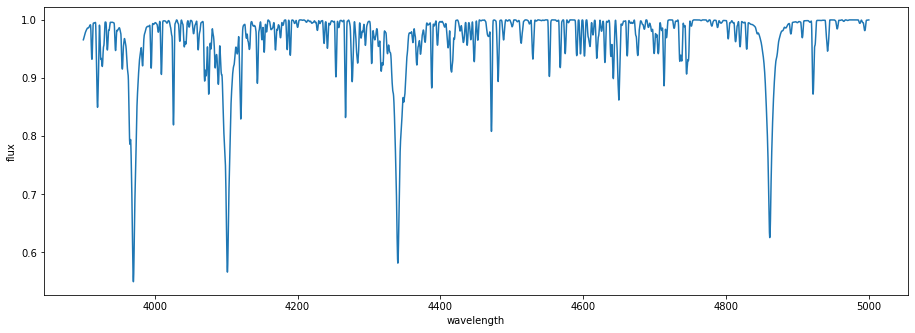

Enter the mean of the normal distribution (0 by defect): 
Enter the standars desviation of the normal distribution: 0.015
Spectrum degradated: 


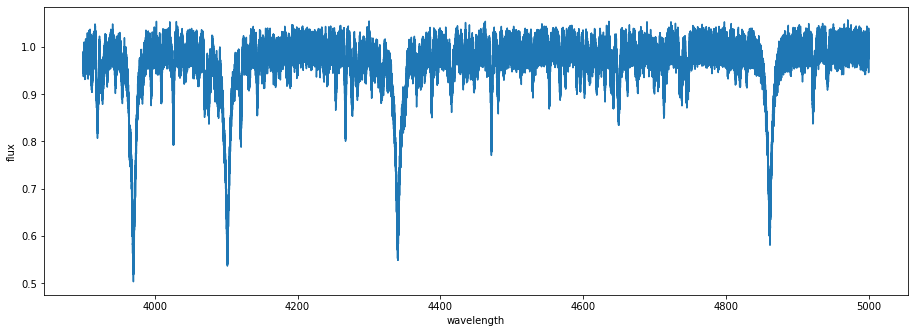

Save retailed spectrum (y/N)?y
Enter spectrum name:ref25000_rw_100_deg
Fecha obs:
2004-03-11T09:10:05
End Data


In [6]:
path = "/home/fran/PythonProjects/TFM/"

fileSpectrum = input ("Enter spectrum to analyze:")
fileSpectrum += ".fits"

#Reading spectrum
header, wavelength, flux, date_obs, tf = readSpec(fileSpectrum, path)
print("All data")

#Plotting spectrum
plotSpectrum(wavelength, flux)

#Degrade spectrum
flux_d = noise(flux)
print("Spectrum degradated: ")
plotSpectrum(wavelength, flux_d)

#Saving spectrum
saveData = input("Save retailed spectrum (y/N)?")
if saveData =="y":    
    fileSpectrum = input("Enter spectrum name:")
    fileSpectrum +=".fits"
    saveSpec(fileSpectrum, header, wavelength, flux_d, date_obs)

print("End Data")
